In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
print('Gender : ', df['Gender'].unique())
print('Married : ',df['Married'].unique())
print('Dependents : ',df['Dependents'].unique())
print('Self_Employed : ', df['Self_Employed'].unique())
#sns.countplot(x ='LoanAmount', data = df )
print('LoanAmountTerm: ', df['Loan_Amount_Term'].unique())
print('Credit_History: ', df['Credit_History'].unique())
print('Property_Area : ', df['Property_Area'].unique())

Gender :  ['Male' 'Female' nan]
Married :  ['No' 'Yes' nan]
Dependents :  ['0' '1' '2' '3+' nan]
Self_Employed :  ['No' 'Yes' nan]
LoanAmountTerm:  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History:  [ 1.  0. nan]
Property_Area :  ['Urban' 'Rural' 'Semiurban']


In [6]:
df['Gender'] = df['Gender'].fillna( df['Gender'].mode().values[0] )
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)

df['Married'] = df['Married'].fillna( df['Married'].mode().values[0] )
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(np.int)

df['Dependents'] = df['Dependents'].fillna( df['Dependents'].mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+').astype(np.int)

df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(np.int)

df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(np.int)

df['Property_Area'] = df['Property_Area'].fillna(df['Property_Area'].mode().values[0])
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2,}).astype(np.int)

df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1}).astype(np.int)

df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )

In [7]:
df['Gender'].value_counts()
df['Married'].value_counts()
df['Dependents'].value_counts()
df['Self_Employed'].value_counts()
df['Education'].value_counts()
df['Property_Area'].value_counts()
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.6+ KB


In [9]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [11]:
X = pd.get_dummies(X)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.8376623376623377

In [21]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train,y_train)

random.score(X_test,y_test)

C:\Users\avani\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7597402597402597

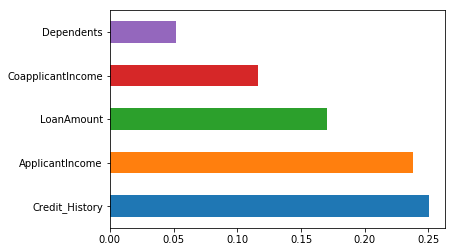

In [23]:
graph = pd.Series(random.feature_importances_, index=X.columns)
graph = graph.nlargest()
graph.plot(kind='barh')